<a href="https://colab.research.google.com/github/Mobashera-Alam/CS-5783-MachineLearning/blob/main/CS-5783-MachineLearning/Assignment%202/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
filename_x_train = "/content/drive/My Drive/ML/Assignment 2/X_train.csv"
filename_y_train = "/content/drive/My Drive/ML/Assignment 2/Y_train.csv"
filename_x_test = "/content/drive/My Drive/ML/Assignment 2/X_test.csv"
filename_y_test = "/content/drive/My Drive/ML/Assignment 2/Y_test.csv"
X_train = pd.DataFrame()
Y_train = pd.DataFrame()
X_train = pd.read_csv(filename_x_train, delim_whitespace = True)
Y_train = pd.read_csv(filename_y_train, delim_whitespace = True)
X_test = pd.read_csv(filename_x_test, delim_whitespace = True)
Y_test = pd.read_csv(filename_y_test, delim_whitespace = True)
X = np.array(X_train)
Y = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)


1. This is a linear regression problem so we choose identity function as activation funciton in output layer.

2. Since output layers has one column (label) so we will need one neuron at output layer to match the dimension. 

In [63]:
#Activation function
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

In [64]:
#Shape of layer
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_y)

In [65]:
def init_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.1
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.1
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [74]:
def forward_propagation(X, parameters, activation):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1

    if activation == "sigmoid":
        A1 = sigmoid(Z1)
    elif activation == "relu":
        
        A1 = relu(Z1)
    elif activation == "tanh":
        A1 = np.tanh(Z1)
    else:
        A1 = sigmoid(Z1)
    
    Z2 = np.dot(W2,A1) + b2
    A2 = Z2

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [75]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    #MSE
    cost = (1/m) * (Y - A2) @ (Y - A2).T
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. E.g., turns [[17]] into 17
    return cost

In [76]:
def backward_propagation(parameters, cache, X, Y, activation):

    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))

    if activation == "sigmoid":
        dZ1 = np.dot(W2.T,dZ2) * sigmoid(Z1) * (1 - sigmoid(Z1))
    elif activation == "relu":
        dZ1 = np.dot(W2.T,dZ2)
        dZ1[Z1 <= 0.0] = 0.0
    elif activation == "tanh":
        dZ1 = np.dot(W2.T,dZ2) * (1 - np.tanh(Z1)*np.tanh(Z1))
    else:
        dZ1 = np.dot(W2.T,dZ2) * sigmoid(Z1) * (1 - sigmoid(Z1))

    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [77]:
def update_parameters(parameters, grads, learning_rate):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [78]:
def MLP_model(X, Y, n_h, learning_rate, activation, num_iterations = 1000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    # Initialize parameters
    parameters = init_params(n_x, n_h, n_y)
    
    cost_tot = []
    # Loop (gradient descent)
    
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
        A2, cache = forward_propagation(X, parameters, activation)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
        cost = compute_cost(A2, Y, parameters)

        cost_tot.append(cost)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        
        grads = backward_propagation(parameters, cache, X, Y, activation)
        
        # Update rule for each parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        # If print_cost=True, Print the cost every 1000 iterations
        if print_cost and i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters, cost_tot


In [79]:
def predict(parameters, X, activation):
    A2, cache = forward_propagation(X, parameters, activation)
    return A2

In [80]:
def plot_cost(cost_tot, num_epochs):
	plt.xlabel('Number of Iterations')
	plt.ylabel('Loss')
	plt.plot(np.arange(num_epochs), cost_tot)
	plt.show()

In [81]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtrain - meanX) / stdX
    xtestSt = xtestSt.T
    ytestSt = (ytrain - meanY) / stdY
    ytestSt = ytestSt.T
    epochs=1000
    lr = 0.1
    activation = "sigmoid"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 2, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

    

    ytestHatSt = predict(parameters, xtestSt, activation)
    #Back to original data
    error = np.sqrt(((ytestHatSt - ytestSt) ** 2).mean())
    print(error)
    

   

if __name__ == "__main__":
    main()

Cost after iteration 0: 1.004850
Cost after iteration 500: 0.021754
W1 = [[-0.0060431   1.35205336]
 [-0.00490626 -0.89208058]]
b1 = [[-0.14537243]
 [ 0.02914582]]
W2 = [[ 2.79369638 -1.2200253 ]]
b2 = [[-0.69923386]]
0.10777607399014275


3. MSE loss =  0.1055994247979705(Will vary for each run) for learning rate = 0.1 on training set. And MSE =0.09982126929708558 on test set. 

Cost after iteration 0: 0.994378
Cost after iteration 500: 0.992260
Cost after iteration 1000: 0.989724
Cost after iteration 0: 1.023878
Cost after iteration 500: 0.941428
Cost after iteration 1000: 0.624901
Cost after iteration 0: 1.006933
Cost after iteration 500: 0.016475
Cost after iteration 1000: 0.010218
Cost after iteration 0: 1.000325
Cost after iteration 500: 0.002851
Cost after iteration 1000: 0.002264


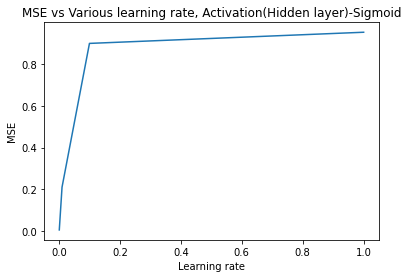

In [82]:
#for various learning rate
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    ytestSt = (ytest - meanY) / stdY

    epochs=1001
    lr = [0.001,0.01,0.1,1]
    error = [0,0,0,0]
    best = [1,1,1,1]

    activation = "sigmoid"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 2, lr[0], activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[0] = np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 2, lr[1], activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[1]= np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 2, lr[2], activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[2] = np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 2, lr[3], activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[3] = np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    tot = np.array(best)-np.array(error)
    plt.plot(lr,tot)
    plt.xlabel('Learning rate')
    plt.ylabel('MSE')
    plt.title('MSE vs Various learning rate, Activation(Hidden layer)-Sigmoid')

if __name__ == "__main__":
    main()

5. From the tested learning rates, we can tell that increasing learning rate improves the model. But for the same number of iteration but learning rate 0.001 to 0.01 the accuracy increases significantly. 

Cost after iteration 0: 0.993105
Cost after iteration 500: 0.037754
Cost after iteration 0: 1.044484
Cost after iteration 500: 0.020248
Cost after iteration 0: 1.024345
Cost after iteration 500: 0.005122
Cost after iteration 0: 1.006507
Cost after iteration 500: 0.004880
Cost after iteration 0: 1.018993
Cost after iteration 500: 0.003731
Cost after iteration 0: 1.030553
Cost after iteration 500: 0.004141


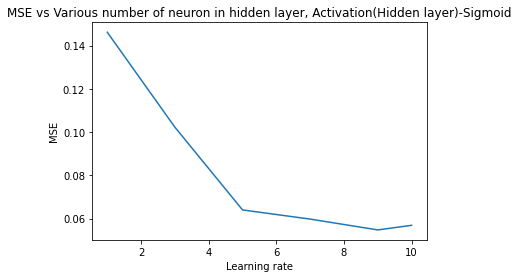

In [83]:
#effect of number of hidden layer
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    ytestSt = (ytest - meanY) / stdY

    epochs=1000
    lr =0.1
    n_n = [1,3,5,7,9,10]
    error = [0,0,0,0,0,0]

    activation = "sigmoid"
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, n_n[0], lr, activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[0] = np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, n_n[1], lr, activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[1]= np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, n_n[2], lr, activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[2] = np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, n_n[3], lr, activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[3] = np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, n_n[4], lr, activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[4] = np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, n_n[5], lr, activation,epochs, print_cost=True)
    ytrainHat = predict(parameters, xtrainSt, activation)
    error[5] = np.sqrt(((ytrainHat - ytrainSt) ** 2).mean())
    plt.plot(n_n,error)
    plt.xlabel('Learning rate')
    plt.ylabel('MSE')
    plt.title('MSE vs Various number of neuron in hidden layer, Activation(Hidden layer)-Sigmoid')
    #accuracy is the difference be
if __name__ == "__main__":
    main()

6.(a) If we change the number of neurons the weight matrix shape will change for example for this given system we have two features so weight matrix in first layer(hidden) would be [no of neurons,input feature] because it gets transposed when performing matrix multiplicaiton. So there will be no change in update rule only the shape of weight matrix will change. Update rule might change when the number of hidden layers changes.

(b)Based on final loss and plot for various neurons we can see that upto 9 neuron in the hidden layer works well but 10 neuron causes overfitting issue.(We validated based on test data as well)  

In [84]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T

    xtestSt = (xtest - meanX) / stdX
    ytestSt = (ytest - meanY) / stdY

    epochs=2000
    lr = 0.1
    activation = "sigmoid"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 1, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

    plot_cost(cost_tot, epochs)

    ytrainHat = predict(parameters, xtrainSt, activation)
 

    

Cost after iteration 0: 0.999060
Cost after iteration 500: 0.023894
W1 = [[-0.05075815  1.4323884 ]
 [ 0.08665793  1.0917683 ]]
b1 = [[-0.23026472]
 [-0.10979338]]
W2 = [[2.54630237 1.21890286]]
b2 = [[-1.74289828]]
(49, 1)


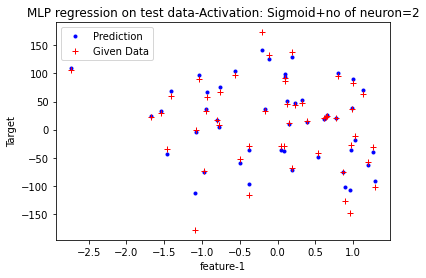

In [85]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    xtestSt = xtestSt.T
    ytestSt = (ytest - meanY) / stdY
    ytestSt = ytestSt.T
    epochs=1000
    lr = 0.1
    activation = "sigmoid"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 2, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print(ytest.shape)
    #Back to original
    ytestHatSt = predict(parameters, xtestSt, activation)
    ytestHat = ytestHatSt*stdY+meanY
    plt.plot(X_test[:,0],ytestHat.T,'.',c='b',label='Prediction')
    plt.plot(X_test[:,0], Y_test,'+',c = 'r', label='Given Data')
    plt.legend()
    plt.xlabel('feature-1')
    plt.ylabel('Target')
    plt.title('MLP regression on test data-Activation: Sigmoid+no of neuron=2')

if __name__ == "__main__":
    main()

Cost after iteration 0: 1.000903
Cost after iteration 500: 0.026082
W1 = [[ 0.05823895 -0.75620716]
 [ 0.01907313  1.37658699]]
b1 = [[ 0.03044621]
 [-0.1485003 ]]
W2 = [[-0.9706366   3.02803818]]
b2 = [[-0.93486101]]
(49, 1)


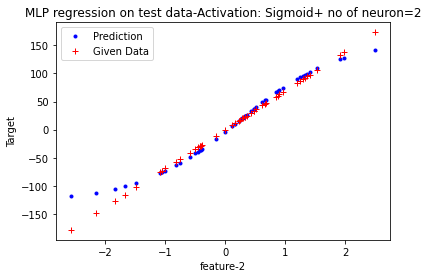

In [86]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    xtestSt = xtestSt.T
    ytestSt = (ytest - meanY) / stdY
    ytestSt = ytestSt.T
    epochs=1000
    lr = 0.1
    activation = "sigmoid"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 2, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print(ytest.shape)
    #Back to original
    ytestHatSt = predict(parameters, xtestSt, activation)
    ytestHat = ytestHatSt*stdY+meanY
    plt.plot(X_test[:,1],ytestHat.T,'.',c='b',label='Prediction')
    plt.plot(X_test[:,1], Y_test,'+',c = 'r', label='Given Data')
    plt.legend()
    plt.xlabel('feature-2')
    plt.ylabel('Target')
    plt.title('MLP regression on test data-Activation: Sigmoid+ no of neuron=2')

if __name__ == "__main__":
    main()

Cost after iteration 0: 0.999014
Cost after iteration 500: 0.005635
W1 = [[-0.15114245 -0.21509955]
 [ 0.09743674 -1.00193618]
 [-0.11140538  0.36826588]
 [-0.01514778  0.91399748]
 [-0.08111952 -0.35447661]
 [ 0.0546141  -0.5435718 ]
 [ 0.11437784  1.00060083]
 [ 0.09646477  0.09366904]
 [-0.1069666   0.0011291 ]]
b1 = [[ 0.0004017 ]
 [ 0.06589193]
 [-0.00617165]
 [-0.04129695]
 [ 0.00395444]
 [ 0.01064002]
 [-0.0463116 ]
 [ 0.00060528]
 [-0.00052859]]
W2 = [[-0.23135804 -1.41470442  0.37575125  1.1694357  -0.39550899 -0.60467815
   1.37094888  0.07332584 -0.00979739]]
b2 = [[-0.11765754]]
(49, 1)


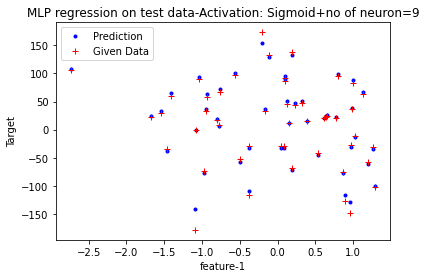

In [87]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    xtestSt = xtestSt.T
    ytestSt = (ytest - meanY) / stdY
    ytestSt = ytestSt.T
    epochs=1000
    lr = 0.1
    activation = "sigmoid"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 9, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print(ytest.shape)
    #Back to original
    ytestHatSt = predict(parameters, xtestSt, activation)
    ytestHat = ytestHatSt*stdY+meanY
    plt.plot(X_test[:,0],ytestHat.T,'.',c='b',label='Prediction')
    plt.plot(X_test[:,0], Y_test,'+',c = 'r', label='Given Data')
    plt.legend()
    plt.xlabel('feature-1')
    plt.ylabel('Target')
    plt.title('MLP regression on test data-Activation: Sigmoid+no of neuron=9')

if __name__ == "__main__":
    main()

Cost after iteration 0: 0.973660
Cost after iteration 500: 0.004469
W1 = [[ 0.00642469 -0.03455454]
 [ 0.01157076  1.01195158]
 [ 0.05477365 -0.77883719]
 [-0.01567943  0.31347462]
 [ 0.05329887  0.14908257]
 [-0.09004706 -0.92808991]
 [ 0.12936809 -0.75768591]
 [ 0.02513053  0.29387828]
 [ 0.05523079  0.51919394]]
b1 = [[ 0.00046169]
 [-0.04883495]
 [ 0.01796751]
 [ 0.0012884 ]
 [ 0.00266192]
 [ 0.02668366]
 [ 0.01908213]
 [ 0.00198907]
 [ 0.00060915]]
W2 = [[-0.00409057  1.42038056 -0.91840009  0.33564111  0.18889857 -1.19556096
  -0.88381881  0.3206572   0.59274614]]
b2 = [[0.1035744]]
(49, 1)


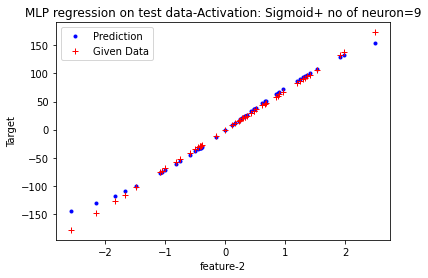

In [88]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    xtestSt = xtestSt.T
    ytestSt = (ytest - meanY) / stdY
    ytestSt = ytestSt.T
    epochs=1000
    lr = 0.1
    activation = "sigmoid"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 9, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print(ytest.shape)
    #Back to original
    ytestHatSt = predict(parameters, xtestSt, activation)
    ytestHat = ytestHatSt*stdY+meanY
    plt.plot(X_test[:,1],ytestHat.T,'.',c='b',label='Prediction')
    plt.plot(X_test[:,1], Y_test,'+',c = 'r', label='Given Data')
    plt.legend()
    plt.xlabel('feature-2')
    plt.ylabel('Target')
    plt.title('MLP regression on test data-Activation: Sigmoid+ no of neuron=9')

if __name__ == "__main__":
    main()

tanh
Cost after iteration 0: 0.900745
Cost after iteration 500: 0.001906
W1 = [[-0.06447766  0.19614216]
 [ 0.13188302 -0.21459151]
 [-0.08023539 -0.21736814]
 [ 0.03566971 -0.18389947]
 [-0.01588002 -0.32747043]
 [-0.01203456 -0.35439574]
 [-0.06935682 -0.34389243]
 [ 0.09294744 -0.27644784]
 [-0.03701547 -0.34874159]
 [-0.10508445  0.01694265]]
b1 = [[ 0.00083701]
 [ 0.00198222]
 [-0.00572263]
 [-0.00200379]
 [ 0.00745353]
 [ 0.02591359]
 [ 0.00518216]
 [ 0.00693446]
 [ 0.01216668]
 [ 0.00078111]]
W2 = [[ 0.22344161 -0.22208267 -0.22852045 -0.20995272 -0.49563583 -0.68387043
  -0.5437287  -0.36693883 -0.56344351  0.02349077]]
b2 = [[0.03066468]]
(49, 1)


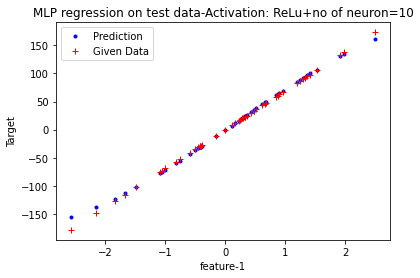

In [89]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    xtestSt = xtestSt.T
    ytestSt = (ytest - meanY) / stdY
    ytestSt = ytestSt.T
    epochs=1000
    lr = 0.1
    activation = "tanh"
    print(activation)

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 10, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print(ytest.shape)
    #Back to original
    ytestHatSt = predict(parameters, xtestSt, activation)
    ytestHat = ytestHatSt*stdY+meanY
    plt.plot(X_test[:,1],ytestHat.T,'.',c='b',label='Prediction')
    plt.plot(X_test[:,1], Y_test,'+',c = 'r', label='Given Data')
    plt.legend()
    plt.xlabel('feature-1')
    plt.ylabel('Target')
    plt.title('MLP regression on test data-Activation: ReLu+no of neuron=10')

if __name__ == "__main__":
    main()

Cost after iteration 0: 0.984456
Cost after iteration 500: 0.002983
W1 = [[-0.08452406  0.21534147]
 [-0.09764402  0.81074539]
 [-0.16457196  0.02238096]
 [-0.0811232  -0.7850589 ]
 [ 0.04317266  0.23596569]
 [-0.24758425  0.13117532]
 [-0.21083073  0.59472609]
 [ 0.1145991   0.76464494]
 [-0.0262068  -0.9051901 ]
 [-0.08464319 -0.74609654]]
b1 = [[-0.00128557]
 [-0.03045643]
 [ 0.0001902 ]
 [ 0.0195941 ]
 [-0.0011127 ]
 [-0.00068268]
 [-0.01479563]
 [-0.01611714]
 [ 0.03388359]
 [ 0.0161845 ]]
W2 = [[ 0.20112193  0.98240921 -0.00469775 -0.9499876   0.23040991  0.14136131
   0.6284075   0.9024081  -1.13480602 -0.87672991]]
b2 = [[-0.02930173]]
(49, 1)


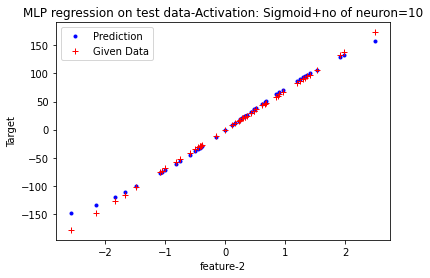

In [90]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    xtestSt = xtestSt.T
    ytestSt = (ytest - meanY) / stdY
    ytestSt = ytestSt.T
    epochs=1000
    lr = 0.1
    activation = "sigmoid"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 10, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print(ytest.shape)
    #Back to original
    ytestHatSt = predict(parameters, xtestSt, activation)
    ytestHat = ytestHatSt*stdY+meanY
    plt.plot(X_test[:,1],ytestHat.T,'.',c='b',label='Prediction')
    plt.plot(X_test[:,1], Y_test,'+',c = 'r', label='Given Data')
    plt.legend()
    plt.xlabel('feature-2')
    plt.ylabel('Target')
    plt.title('MLP regression on test data-Activation: Sigmoid+no of neuron=10')

if __name__ == "__main__":
    main()

7.(a)Since update rule need to multiply the derivativ of the activation functions, so we need to change the update rule based on activation function as well. 

(b)The change occurs in the backpropagation during chain rule and in forward propagation when we need to use a = g(z).So where we need to use the activation function and its derivative we need to change to achieve this experiement.

(c)Based on the true label and the prediction we can tell that ReLu works slightly better for our given system compared to sigmoid and tanh. 


Cost after iteration 0: 1.025866
Cost after iteration 500: 0.003202
W1 = [[-0.10757329  0.28239369]
 [ 0.16735019  0.33105523]
 [-0.05606834  0.2649645 ]
 [ 0.0275629  -0.37638737]
 [-0.01960639 -0.37991485]]
b1 = [[0.00326202]
 [0.024213  ]
 [0.00490792]
 [0.05804221]
 [0.00293377]]
W2 = [[ 0.34810084  0.45663639  0.31035239 -1.17609046 -0.82366738]]
b2 = [[0.05264949]]
(49, 1)


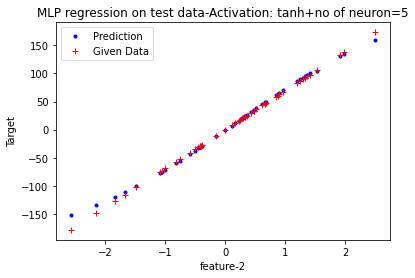

In [92]:
def main():
    xtrain = np.array(X_train)
    ytrain = np.array(Y_train)
    xtest = np.array(X_test)
    ytest = np.array(Y_test)
    # take mean and standard deviation of features of the training set for standardization
    meanX = np.mean(xtrain, axis=0)
    stdX = np.std(xtrain, axis=0)
    # standardize features of the trainig set
    xtrainSt = (xtrain - meanX) / stdX
    xtrainSt = xtrainSt.T
    meanY = np.mean(ytrain, axis=0)
    stdY = np.std(ytrain, axis=0)
    ytrainSt = (ytrain - meanY) / stdY
    ytrainSt = ytrainSt.T
    xtestSt = (xtest - meanX) / stdX
    xtestSt = xtestSt.T
    ytestSt = (ytest - meanY) / stdY
    ytestSt = ytestSt.T
    epochs=1000
    lr = 0.1
    activation = "tanh"

    parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 5, lr, activation,epochs, print_cost=True)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print(ytest.shape)
    #Back to original
    ytestHatSt = predict(parameters, xtestSt, activation)
    ytestHat = ytestHatSt*stdY+meanY
    plt.plot(X_test[:,1],ytestHat.T,'.',c='b',label='Prediction')
    plt.plot(X_test[:,1], Y_test,'+',c = 'r', label='Given Data')
    plt.legend()
    plt.xlabel('feature-2')
    plt.ylabel('Target')
    plt.title('MLP regression on test data-Activation: tanh+no of neuron=5')

if __name__ == "__main__":
    main()

Cost after iteration 0: 1.015263
Cost after iteration 500: 0.006115
W1 = [[ 0.04020915 -0.94586691]
 [-0.07386688  0.91342734]
 [-0.02105605 -0.02521719]
 [ 0.19597062  0.21156462]
 [ 0.09358355  0.26330316]]
b1 = [[-0.04701019]
 [ 0.04317357]
 [-0.01272592]
 [ 0.04471835]
 [ 0.38759357]]
W2 = [[-0.9454832   0.92541552 -0.01869016  0.14111745  0.46521877]]
b2 = [[-0.22549717]]
(49, 1)


Text(0.5, 1.0, 'MLP regression on test data-Activation: ReLu+no of neuron=5')

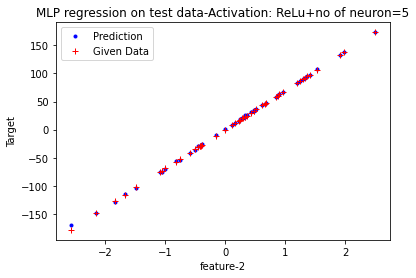

In [91]:
xtrain = np.array(X_train)
ytrain = np.array(Y_train)
xtest = np.array(X_test)
ytest = np.array(Y_test)
# take mean and standard deviation of features of the training set for standardization
meanX = np.mean(xtrain, axis=0)
stdX = np.std(xtrain, axis=0)
# standardize features of the trainig set
xtrainSt = (xtrain - meanX) / stdX
xtrainSt = xtrainSt.T
meanY = np.mean(ytrain, axis=0)
stdY = np.std(ytrain, axis=0)
ytrainSt = (ytrain - meanY) / stdY
ytrainSt = ytrainSt.T
xtestSt = (xtest - meanX) / stdX
xtestSt = xtestSt.T
ytestSt = (ytest - meanY) / stdY
ytestSt = ytestSt.T
epochs=1000
lr = 0.1
activation = "relu"

parameters, cost_tot = MLP_model(xtrainSt, ytrainSt, 5, lr, activation,epochs, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print(ytest.shape)
#Back to original
ytestHatSt = predict(parameters, xtestSt, activation)
ytestHat = ytestHatSt*stdY+meanY
plt.plot(X_test[:,1],ytestHat.T,'.',c='b',label='Prediction')
plt.plot(X_test[:,1], Y_test,'+',c = 'r', label='Given Data')
plt.legend()
plt.xlabel('feature-2')
plt.ylabel('Target')
plt.title('MLP regression on test data-Activation: ReLu+no of neuron=5')